In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

SVM are a discriminative classifier, as they draw boundaries between the culters of data.

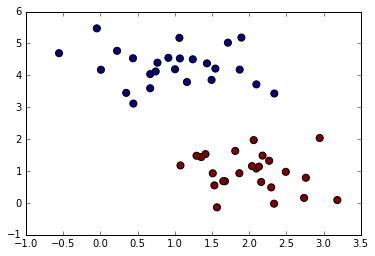

In [2]:
import random
from sklearn.datasets.samples_generator import make_blobs
random.seed(98)
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0,
                  cluster_std = 0.60)

# print X, y
plt.scatter(X[:, 0], X[:, 1], c=y, s = 50);

In [3]:
# Now lets use SVM classifier to the points

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Lets make a decision function to see what it actually looks like. This will be a great way to plot LINEAR decision functions in the future.

In [4]:
def plot_svc_decision_function(clf):
    """Plot the decision function for a 2D SVC"""
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    return plt.contour(X, Y, P, colors='k',
                       levels=[-1, 0, 1],
                       linestyles=['--', '-', '--'])

/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1,

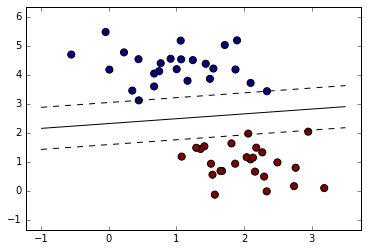

In [5]:
# Stack the two plots on each other
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf);

/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1,

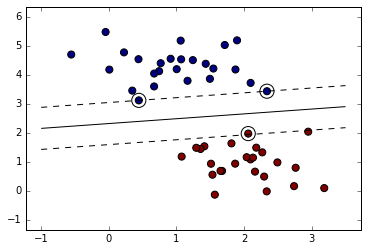

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1,

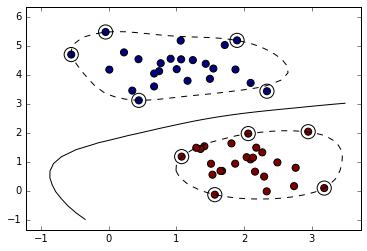

In [7]:
clf = SVC(kernel='rbf')
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

Lets take a look at random forests.

In [8]:
from sklearn.tree import DecisionTreeClassifier

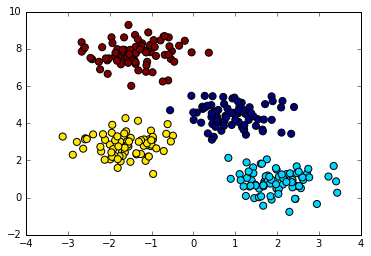

In [9]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In [10]:
# So lets write some code that shows where certain "classes" of decisions will be.

# No depreciation this time!

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.3)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

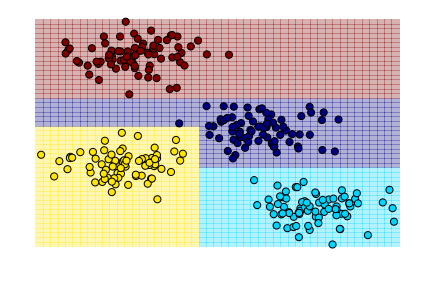

In [11]:
clf = DecisionTreeClassifier(max_depth=10)

# Your overlaying the clf on-top of the data.
plot_estimator(clf, X, y)

So we can use RF (Random Forests) so we stop the issue of overfitting the data. RF uses the combination of several estimators to give a good aproximation of the data. How easy is it to do this? Import the RF from scikit learn...

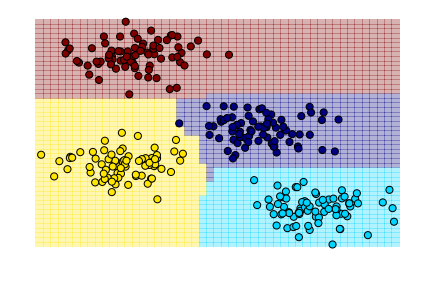

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=0)
plot_estimator(clf, X, y)

Sweet deal. Now lets classify come digits.

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [14]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


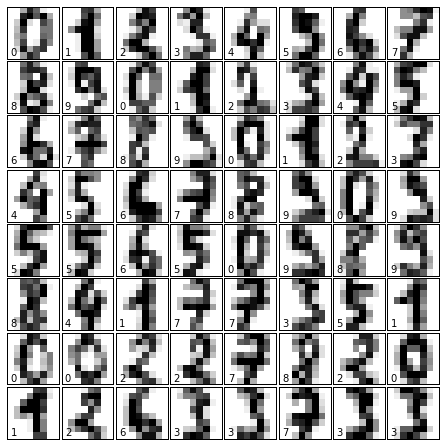

In [15]:
# Lets get a little refresh on what were working with.
# So, let's set up the figure as we did before

fig = plt.figure(figsize=(6, 6))  # figure size in inches, again
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

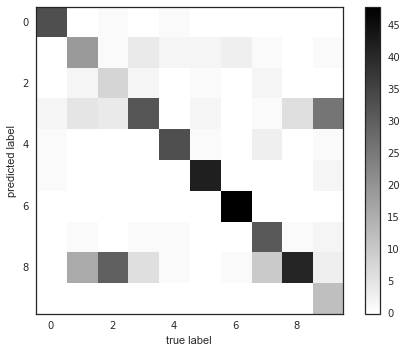

In [20]:
import seaborn as sns
sns.set(style="white")

from sklearn.cross_validation import train_test_split
from sklearn import metrics

# train_test_split() --> Split arrays or matrices into random train and test subsets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

# DecisionTreeClassifier() --> max_depth() --> The maximum depth of the tree. If None, then nodes are expanded 
# until all leaves are pure or until all leaves contain less than min_samples_split samples. 
clf = DecisionTreeClassifier(max_depth = 5)

# Fit the classifier on the training data.
clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)

# imshow() --> Display an image on the axes.
sns.plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)

sns.plt.colorbar()
sns.plt.xlabel("true label")
sns.plt.ylabel("predicted label");

Lets do the classification test with sklearn.svm.SVC

In [21]:
clf = SVC(kernel = 'linear')
# clf.fit(Xtrain, ytrain)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC: kernel = rbf
0.541483398619
SVC: kernel = linear

/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" in


0.97112374636
RF: max_depth = 3
0.738080417602
RF: max_depth = 5

/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" in


0.875786497081
RF: max_depth = 10
0.953391341292


/Users/robertdefilippi/miniconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


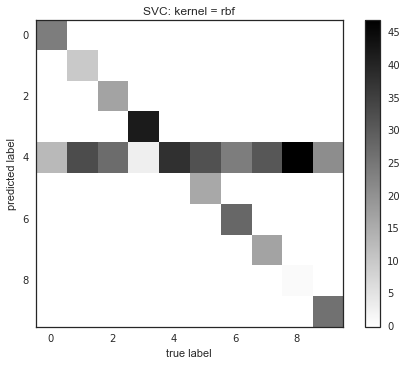

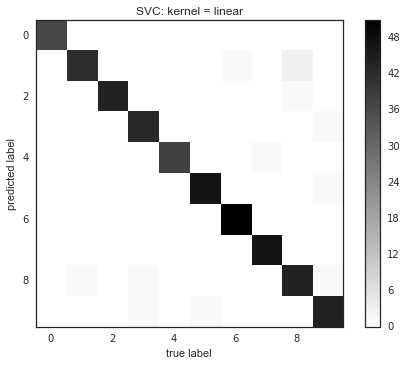

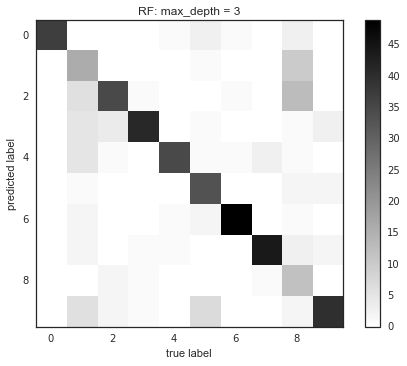

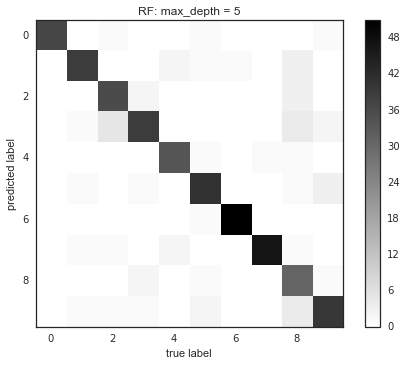

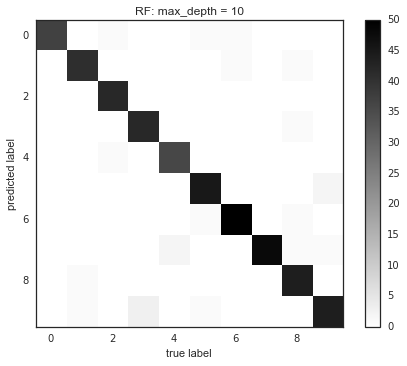

In [32]:
# %load solutions/04_svm_rf.py
# SVM results
from sklearn.svm import SVC
from sklearn import metrics

for kernel in ['rbf', 'linear']:
    clf = SVC(kernel=kernel).fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    print("SVC: kernel = {0}".format(kernel))
    print(metrics.f1_score(ytest, ypred))
    plt.figure()
    plt.imshow(metrics.confusion_matrix(ypred, ytest),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.title("SVC: kernel = {0}".format(kernel))
    
# random forest results
from sklearn.ensemble import RandomForestClassifier

for max_depth in [3, 5, 10]:
    clf = RandomForestClassifier(max_depth=max_depth).fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    print("RF: max_depth = {0}".format(max_depth))
    print(metrics.f1_score(ytest, ypred))
    plt.figure()
    plt.imshow(metrics.confusion_matrix(ypred, ytest),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.title("RF: max_depth = {0}".format(max_depth))